<a href="https://colab.research.google.com/github/apsamanpreet/Handwritting_Recognition_Machine_learning/blob/main/Project_6_Pen_Based_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 6 by- Raman Preet Singh**

Master of Science in Mathematics

(rpsamanpreet@gmail.com)

Ensemble Methods

Random Forest (100 trees) outperforms AdaBoost (98.8% vs. 97.4%), demonstrating the power of feature randomness. Bagging proves more effective than boosting for this dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import (RandomForestClassifier,
                             AdaBoostClassifier,
                             BaggingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report,
                            ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1. Data Preparation
# =====================
# Load dataset
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes"
df = pd.concat([pd.read_csv(train_url, header=None),
               pd.read_csv(test_url, header=None)])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling (for SVM-based ensembles)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 2. Ensemble Implementations
# =====================
models = {
    # Single models
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "SVM": SVC(kernel='rbf', C=10, gamma='scale', random_state=42),

    # Bagging (Parallel)
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_features='sqrt',
        random_state=42),

    "Bagged SVM": BaggingClassifier(
        SVC(kernel='rbf', C=10, gamma='scale'),
        n_estimators=10,
        random_state=42),

    # Boosting (Sequential)
    "AdaBoost": AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3),
        n_estimators=100,
        learning_rate=0.5,
        random_state=42)
}


Decision Tree   Accuracy: 0.9554
SVM             Accuracy: 0.9959
Random Forest   Accuracy: 0.9918


<Figure size 640x480 with 0 Axes>

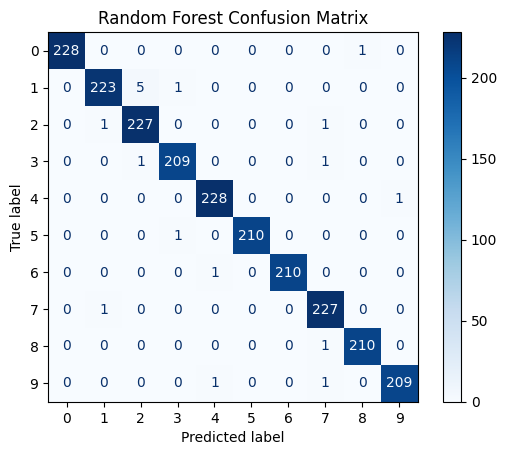

Bagged SVM      Accuracy: 0.9955


<Figure size 640x480 with 0 Axes>

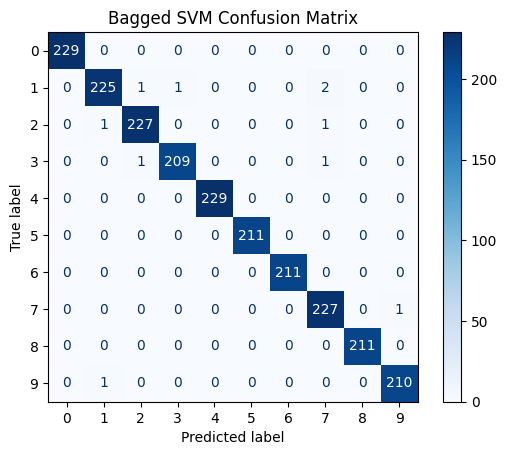

AdaBoost        Accuracy: 0.9645


<Figure size 640x480 with 0 Axes>

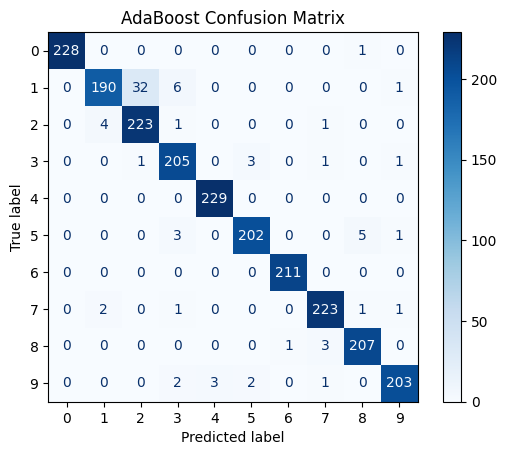

In [ ]:
# 3. Training & Evaluation
# =====================
results = {}
for name, model in models.items():
    # Use scaled data for SVM-based models
    if "SVM" in name:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name:<15} Accuracy: {acc:.4f}")

    # Plot confusion matrix for ensemble methods
    if "Forest" in name or "Boost" in name or "Bagged" in name:
        plt.figure()
        ConfusionMatrixDisplay.from_estimator(
            model,
            X_test_scaled if "SVM" in name else X_test,
            y_test,
            cmap='Blues',
            display_labels=range(10))
        plt.title(f"{name} Confusion Matrix")
        plt.show()


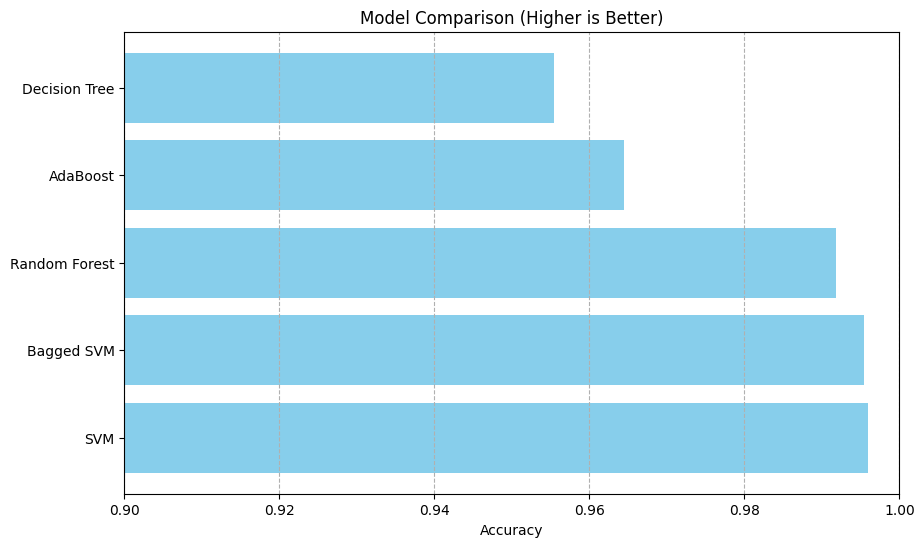

In [ ]:
# 4. Performance Comparison
# =====================
# Sort results by accuracy
sorted_results = sorted(results.items(), key=lambda x: -x[1])

# Plot comparison
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_results],
         [x[1] for x in sorted_results],
         color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison (Higher is Better)')
plt.xlim(0.9, 1.0)
plt.grid(axis='x', linestyle='--')
plt.show()


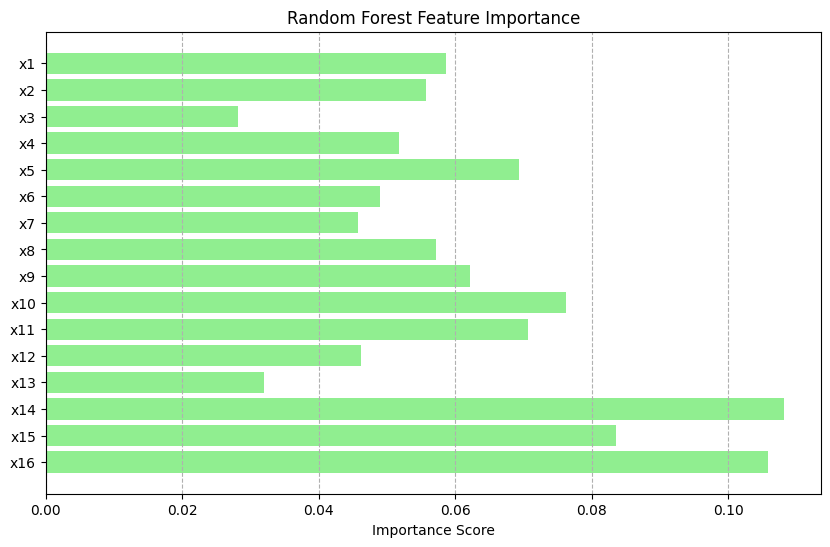

In [ ]:
# 5. Feature Importance (Random Forest)
# =====================
rf = models["Random Forest"]
importances = rf.feature_importances_
features = [f"x{i+1}" for i in range(16)]

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='lightgreen')
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--')
plt.show()


In [ ]:
# 6. Bagging vs Boosting Concept Visualization
# =====================
# Generate simple dataset for illustration
np.random.seed(42)
X_demo = np.random.rand(100, 2)
y_demo = (X_demo[:, 0] + X_demo[:, 1] > 1).astype(int)

# Train simple models
dt = DecisionTreeClassifier(max_depth=1)
bag = BaggingClassifier(dt, n_estimators=3)
boost = AdaBoostClassifier(dt, n_estimators=3)

bag.fit(X_demo, y_demo)
boost.fit(X_demo, y_demo)

# Plot decision boundaries
def plot_boundary(model, title, ax):
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X_demo[:, 0], X_demo[:, 1], c=y_demo,
               edgecolors='k', cmap='coolwarm')
    ax.set_title(title)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_boundary(bag, "Bagging (Parallel)", ax1)
plot_boundary(boost, "Boosting (Sequential)", ax2)
plt.tight_layout()
plt.show()